# 1) Importing Libraries

In [758]:
# importing padas to read the data
import pandas as pd
import numpy as np
## All the Scikit learn libraries that will be used 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
# calculate accuracy measures and confusion matrix
from sklearn import metrics
from sklearn.metrics import confusion_matrix
#importing seaborn for statistical plots
import seaborn as sns
# importing ploting libraries
import matplotlib.pyplot as plt  
%matplotlib inline
# for preprocessing the data
from sklearn.preprocessing import LabelEncoder
# Over Sampling
import imblearn
from imblearn.over_sampling import SMOTE
# Suppress warnings
import warnings
warnings.filterwarnings("ignore")

# 2) Reading the Data and Storing it in the Variable named as Credit_df

In [759]:
credit_df = pd.read_csv("C:\\Users\\Sharang\\Desktop\\credit.csv")

## 2.1) Creating the copy of the main Dataframe

In [760]:
credit_main = credit_df.copy()

## 2.2) Checking the first 5 rows of the data

In [761]:
credit_df.head(5)

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes


## 2.3) Checking the informatiation of the Data 

In [762]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
checking_balance        1000 non-null object
months_loan_duration    1000 non-null int64
credit_history          1000 non-null object
purpose                 1000 non-null object
amount                  1000 non-null int64
savings_balance         1000 non-null object
employment_duration     1000 non-null object
percent_of_income       1000 non-null int64
years_at_residence      1000 non-null int64
age                     1000 non-null int64
other_credit            1000 non-null object
housing                 1000 non-null object
existing_loans_count    1000 non-null int64
job                     1000 non-null object
dependents              1000 non-null int64
phone                   1000 non-null object
default                 1000 non-null object
dtypes: int64(7), object(10)
memory usage: 132.9+ KB


In [763]:
credit_df.columns

Index(['checking_balance', 'months_loan_duration', 'credit_history', 'purpose',
       'amount', 'savings_balance', 'employment_duration', 'percent_of_income',
       'years_at_residence', 'age', 'other_credit', 'housing',
       'existing_loans_count', 'job', 'dependents', 'phone', 'default'],
      dtype='object')

## 2.4) Checking for the Null values in the Data

In [764]:
credit_df.isnull().sum()

checking_balance        0
months_loan_duration    0
credit_history          0
purpose                 0
amount                  0
savings_balance         0
employment_duration     0
percent_of_income       0
years_at_residence      0
age                     0
other_credit            0
housing                 0
existing_loans_count    0
job                     0
dependents              0
phone                   0
default                 0
dtype: int64

## 2.5) Replacing the values in 'checking_balance' column and giving it the proper name

Replacing the values with the proper name in the column 'checking_balance'

In [765]:
credit_df['checking_balance'].unique()

array(['< 0 DM', '1 - 200 DM', 'unknown', '> 200 DM'], dtype=object)

In [766]:
credit_df['checking_balance'] = credit_df["checking_balance"].replace(['< 0 DM', '1 - 200 DM', 'unknown', '> 200 DM'],
                                                                ["less", "moderate", "unknown", "rich"])

## 2.6) Replacing the values in 'savings_balance' column and giving it the proper name

Replacing the values with the proper name in the column 'saving_balance'

In [767]:
credit_df['savings_balance'].unique()

array(['unknown', '< 100 DM', '500 - 1000 DM', '> 1000 DM',
       '100 - 500 DM'], dtype=object)

In [768]:
credit_df['savings_balance'] = credit_df["savings_balance"].replace(['unknown', '< 100 DM', '500 - 1000 DM', '> 1000 DM',
       '100 - 500 DM'], ["unknown", "less", "rich", "v_rich", "moderate" ])

# 3) Exploratory Data Analysis(EDA)

## 3.1) Creating Count Plot Between the columns Job and default

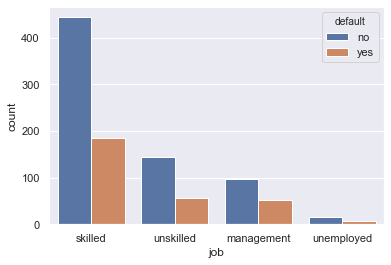

In [769]:
sns.countplot(x= 'job', data = credit_df, hue= 'default')

From this graph, it can be observed that the maximum sample in this data belongs to the Skilled Job class. 

In all the Job classes the count of defaulters is lower than the count of Non-defaulters

## 3.2) Creating Count Plot Between the columns housing and default

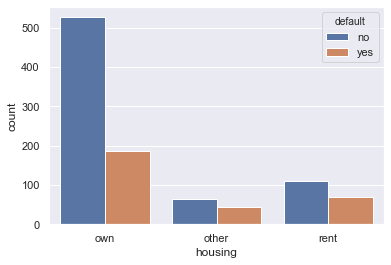

In [770]:
sns.countplot(x= 'housing', data = credit_df, hue= 'default')

It can be observed from this graph that the majority of samples belong to the people who have their own house. 

In all other Housing groups, the count of defaulters and non-defaulters are almost close

## 3.3) Creating Count Plot Between the columns saving_balance and default

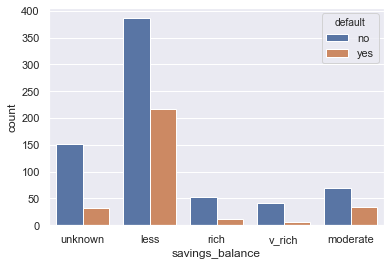

In [771]:
sns.countplot(x= 'savings_balance', data = credit_df, hue= 'default')

It can be interpreted from this graph that people who are saving less money is likely to default more than others. 

People who are rich and very rich are likely to pay their credits back on time.



## 3.4) Creating Count Plot Between the columns checking_balance and default

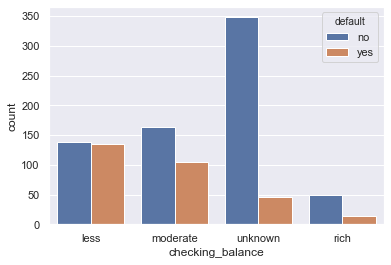

In [772]:
sns.countplot(x= 'checking_balance', data = credit_df, hue= 'default')

This graph states that people who have a less current salary have an almost equal chance of defaulting and non-defaulting.

Rich people tend to pay their loans on time.

People with Unknown salary also have very fewer defaulters.

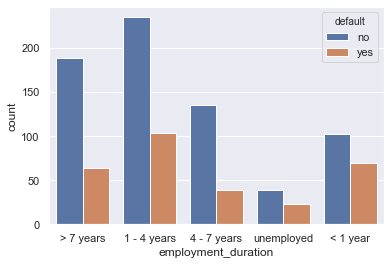

In [773]:
sns.countplot(x= 'employment_duration', data = credit_df, hue= 'default')

This graph shows that Unemployed people likely to fall in the defaulters “category”.   

People who have been employed for more than 4 years but less than 7 years are likely to pay the loan. 

People who have been employed for more than 7 years are likely to repay the loan and people who have experienced less than one year might fall into the defaulters' category.

# 4) Feature Engineering 

## 4.1) Mapping the Values 

Columns 'checking_balance' and 'savings_balance' have the almost similar features.

Column 'checking_balance' has "less", "moderate", "unknown", "rich"

Column 'saving_balance' has "unknown", "less", "rich", "v_rich", "moderate" 

from this we can club columns "saving_balance and checking balance" into three categories "Less", "Rich", "Moderate"

In [774]:
credit_df['checking_balance'] = credit_df['checking_balance'].map({'less': 'less', 'moderate': 'moderate','rich':'rich', 'unknown':'rich' })

In [775]:
credit_df['savings_balance'] = credit_df['savings_balance'].map({'less': 'less', 'moderate': 'moderate','rich':'rich', 'unknown':'rich', 
                                                               'v_rich': 'rich'})

## 4.2) Label Encoding all the categorical columns 

Using Label Encoder we can encode the categorical variable into numercial varibale, so label encoder we will be used on column "Purpose"
The "Purpose" column have 6 features 'furniture/appliances', 'education', 'car', 'business','renovations', 'car0

Similarly will encode the categorical varibale on the columns "checking_balance", "credit_history", "savings_balance" 

In [776]:
LE = LabelEncoder()
credit_df['purpose'] = LE.fit_transform(credit_df['purpose'])

In [777]:
credit_df['job'] = LE.fit_transform(credit_df['job'])
credit_df['checking_balance'] = LE.fit_transform(credit_df['checking_balance'])
credit_df['savings_balance'] = LE.fit_transform(credit_df['savings_balance'])
credit_df['credit_history'] = LE.fit_transform(credit_df['credit_history'])
credit_df["credit_history"] = LE.fit_transform(credit_df['credit_history'])
credit_df['employment_duration'] = LE.fit_transform(credit_df['employment_duration'])

## 4.3) Chechking for Imbalance Class 

In [778]:
credit_df['default'] = credit_df['default'].map({'no':0, 'yes': 1})

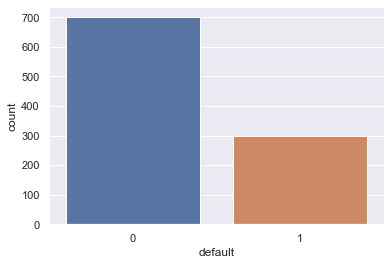

In [779]:
sns.countplot(credit_df['default'])

Count Plot shows the Count of Class 1 is 300 and Count of Class 2 is 700, to counter this, We need to Upsample the Minority Class,

there are several techniques to Upsample the Minority Class, but in this case will use Synthetic Minority Oversampling Technique or SMOTE

In [780]:
X = credit_df.drop(["other_credit", "housing", "phone", "default"], axis = 1)
Y = credit_df["default"]

In [781]:
X, Y = SMOTE().fit_resample(X, Y)

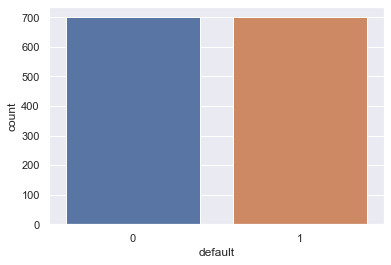

In [782]:
sns.countplot(Y)

Here We can see that Class 1 has been Upsampled from 300 to 700

In [783]:
X.columns

Index(['checking_balance', 'months_loan_duration', 'credit_history', 'purpose',
       'amount', 'savings_balance', 'employment_duration', 'percent_of_income',
       'years_at_residence', 'age', 'existing_loans_count', 'job',
       'dependents'],
      dtype='object')

In [784]:
X.describe()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,existing_loans_count,job,dependents
count,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000
mean,0.971429,21.790714,1.095714,2.390000,3465.818571,0.556429,1.420000,2.910714,2.735000,35.055714,1.338571,1.194286,1.119286
std,0.836471,12.208391,1.025471,1.568329,3010.571692,0.820372,1.279698,1.099041,1.082938,10.852631,0.544986,0.907893,0.324240
min,0.000000,4.000000,0.000000,0.000000,250.000000,0.000000,0.000000,1.000000,1.000000,19.000000,1.000000,0.000000,1.000000
25%,0.000000,12.000000,0.000000,1.000000,1355.000000,0.000000,0.000000,2.000000,2.000000,27.000000,1.000000,1.000000,1.000000
50%,1.000000,18.000000,1.000000,3.000000,2360.500000,0.000000,1.000000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,2.000000,27.000000,1.000000,4.000000,4524.500000,1.000000,3.000000,4.000000,4.000000,41.000000,2.000000,1.000000,1.000000
max,2.000000,72.000000,4.000000,5.000000,18424.000000,2.000000,4.000000,4.000000,4.000000,75.000000,4.000000,3.000000,2.000000


## 4.4) Standardization for bringing all features into single scale

In [785]:
## Initializing the StandardScaler
X_scale = MinMaxScaler()
## Standardize all the feature columns
X_scaled = X_scale.fit_transform(X) 


# 5) Build the Model 

1) First Step while building the machine learning model is to Split the data into training and testing set

2) Import the library that we want to use to build the machine learning model

3) Validate the model and Measure the Model Accuracy

4) deployment

## 5.1) Spliting up the data into training and testing set

In [786]:
train_x, test_x, train_y, test_y = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

In [787]:
print(train_x.shape)
print(test_x.shape)


(1120, 13)
(280, 13)


## 5.2) fitting the model

### 5.2.1) LogisticRegression

Logistic regression is a statistical model in which the target vector is a discrete value and the features matrix can consist of variables that can either be continuous or discrete values.

the binary logistic regression model is given by

P(Y=1)=e^Z/(1+e^Z )


In [788]:
logit = LogisticRegression()
logit.fit(train_x, train_y)

LogisticRegression()

predict() on the test set

In [789]:
pred_y =  logit.predict(test_x)

Prediction the training set

In [790]:
pred_y_train = logit.predict(train_x)

#### 5.2.1.1) Confusion Matrix for checking the actual and predicted values

In [791]:
def draw_cm( actual, predicted ):
    cm = metrics.confusion_matrix( actual, predicted, [0,1] )
    sns.set(font_scale=1) # Adjust to fit
    sns.heatmap(cm, annot=True, fmt='.2f')
    xticklabels = ["Bad credit", "Good Credit"] ,
    yticklabels = ["Bad credit", "Good Credit"] 
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tick_params(axis='both', which='major', labelsize=5) 
    plt.show() 

In [792]:
print( metrics.confusion_matrix( test_y, pred_y ) ) 

[[106  43]
 [ 30 101]]


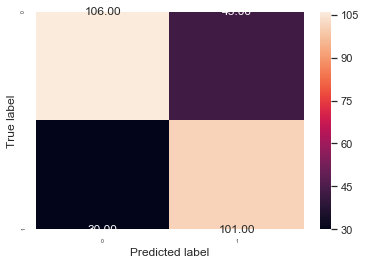

In [793]:
cm = draw_cm(test_y, pred_y)
cm

1) True Positive(TP): 106 Good Credit(0) was predicted as positive.
    
2) False Positive(FP): 43 Good Credit(0) which was positive, but predicted as negative.
    
3) False Negative(FN): 30 Bad Credit(1) which was Negative but predicted as positive.

4) True Negative(TN): 101 Bad Credit(1) was predicted as the Negative

### 5.2.1.2) Classification Report

##### 5.2.1.2.1) Testing report

In [794]:
print( metrics.classification_report( test_y, pred_y ) ) 


              precision    recall  f1-score   support

           0       0.78      0.71      0.74       149
           1       0.70      0.77      0.73       131

    accuracy                           0.74       280
   macro avg       0.74      0.74      0.74       280
weighted avg       0.74      0.74      0.74       280



##### 5.2.1.2.2) Training report

In [795]:
print( metrics.classification_report( train_y, pred_y_train ) ) 

              precision    recall  f1-score   support

           0       0.77      0.75      0.76       551
           1       0.76      0.79      0.78       569

    accuracy                           0.77      1120
   macro avg       0.77      0.77      0.77      1120
weighted avg       0.77      0.77      0.77      1120



In [796]:
## ## Predicting the probability values for test cases
predict_df = pd.DataFrame( logit.predict_proba( test_x ) )
predict_df.head() 

,0,1
0,0.674228,0.325772
1,0.404693,0.595307
2,0.838541,0.161459
3,0.581912,0.418088
4,0.503836,0.496164


In [797]:
## Initializing the DataFrame with actual class lables
test_results = pd.DataFrame( { 'actual': test_y } )
test_results = test_results.reset_index()
## Assigning the probability values for class label 1
test_results['default_1'] = predict_proba_df.iloc[:,1:2] 


#### 5.2.1.2) ROC and AUC Score to measure the model perormance 

In [798]:
auc_score = metrics.roc_auc_score( test_results.actual, test_results.default_1)
round( float( auc_score ), 2 ) 


0.85

## 5.2.2) K-Nearest Neighbors (KNN)

KNN is a non-parametric, lazy learning algorithm used for regression and classification problems. KNN uses the distance formula to identify the new observations. Mostly used distance formula is Euclidean distance. Few more common distance formulas are 
Minkowski Distance, Jaccard, and Gowers Coefficient.


In [799]:
## Initializing the classifier
knn_clf = KNeighborsClassifier()
## Fitting the model with the training set
knn_clf.fit( train_x, train_y) 


KNeighborsClassifier()

In [829]:
print( metrics.confusion_matrix( test_y, pred_y_knn ) ) 

[[100  49]
 [ 24 107]]


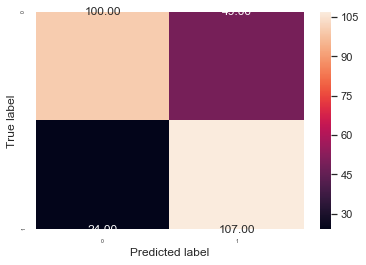

In [801]:
## Predicting on test set
pred_y_knn = knn_clf.predict(test_x)
## Drawing the confusion matrix for KNN model
draw_cm( test_y, pred_y_knn ) 


1) True Positive(TP): 100 Good Credit(0) was predicted as positive.
    
2) False Positive(FP): 49 Good Credit(0) which was positive, but predicted as negative.
    
3) False Negative(FN): 24 Bad Credit(1) which was Negative but predicted as positive.
    
4) True Negative(TN): 107 Bad Credit(1) was predicted as the Negative


In [802]:
pred_knn = knn_clf.predict(train_x)

### 5.2.2.1) Classification Report 

##### 5.2.2.1.1) Testing report

In [803]:
print( metrics.classification_report( test_y, pred_y_knn ) ) 

              precision    recall  f1-score   support

           0       0.81      0.67      0.73       149
           1       0.69      0.82      0.75       131

    accuracy                           0.74       280
   macro avg       0.75      0.74      0.74       280
weighted avg       0.75      0.74      0.74       280



##### 5.2.2.1.2) Training report

In [804]:
print( metrics.classification_report( train_y, pred_knn ) ) 

              precision    recall  f1-score   support

           0       0.86      0.81      0.83       551
           1       0.82      0.87      0.85       569

    accuracy                           0.84      1120
   macro avg       0.84      0.84      0.84      1120
weighted avg       0.84      0.84      0.84      1120



## 5.3) GridSearch 

Selection of Hyperparameter can be done by the using by GridSearch CV, it search thorugh the set and find the optimal hypermeter

### 5.3.1 GridSearch Cv for K Nearest neighbor

In [805]:
tuned_parameters = [{'n_neighbors': range(5,10),
'metric': ['canberra', 'euclidean', 'minkowski']}]
## Configuring grid search
clf = GridSearchCV(KNeighborsClassifier(),
tuned_parameters,
cv=10,
scoring='roc_auc')
## fit the search with training set
clf.fit(train_x, train_y)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid=[{'metric': ['canberra', 'euclidean', 'minkowski'],
                          'n_neighbors': range(5, 10)}],
             scoring='roc_auc')

In [806]:
clf.best_score_

0.847165407430915

In [807]:
clf.best_params_

{'metric': 'canberra', 'n_neighbors': 9}

# 5.4) Random Forest

Random forest is one of the most popular ensemble techniques used in the industry due to its performance and scalability, It’s an ensemble of decision trees.
Random Forest model are:
1.	The number of decision trees.
2.	The number of records and features to be sampled.
3.	The depth and search criteria (Gini impurity index or entropy).


In [808]:
radm_clf = RandomForestClassifier( max_depth=10, n_estimators=10)
radm_clf.fit( train_x, train_y ) 

RandomForestClassifier(max_depth=10, n_estimators=10)

In [830]:
print( metrics.confusion_matrix( test_y, pred_y_rand ) ) 

[[115  34]
 [ 22 109]]


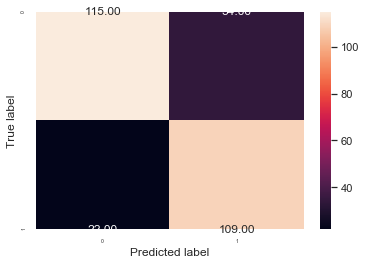

In [810]:
## Predicting on test set
pred_y_rand = radm_clf.predict(test_x)
## Drawing the confusion matrix for KNN model
draw_cm( test_y, pred_y_rand )

1) True Positive(TP): 115 Good Credit(0) was predicted as positive.
    
2) False Positive(FP): 34 Good Credit(0) which was positive, but predicted as negative.
    
3) False Negative(FN): 22 Bad Credit(1) which was Negative but predicted as positive.
    
4) True Negative(TN): 109 Bad Credit(1) was predicted as the Negative

In [811]:
pred_rand = radm_clf.predict(train_x)

### 5.4.1) Classification Report

##### 5.4.1.1.1) Testing report

In [812]:
print( metrics.classification_report( test_y, pred_y_rand ) ) 

              precision    recall  f1-score   support

           0       0.84      0.77      0.80       149
           1       0.76      0.83      0.80       131

    accuracy                           0.80       280
   macro avg       0.80      0.80      0.80       280
weighted avg       0.80      0.80      0.80       280



##### 5.4.1.1.2) Training report

In [813]:
print( metrics.classification_report( train_y, pred_rand ) ) 

              precision    recall  f1-score   support

           0       0.96      0.93      0.94       551
           1       0.93      0.96      0.95       569

    accuracy                           0.95      1120
   macro avg       0.95      0.95      0.95      1120
weighted avg       0.95      0.95      0.95      1120



### 5.4.2) Finding the Important features 

Feature Importance gives the good insights into which features have important information with respect to the outcome variable

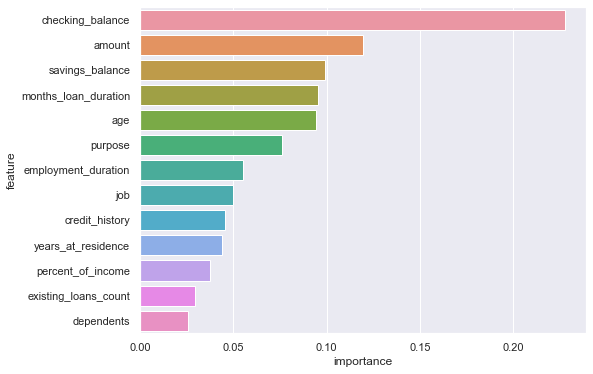

In [814]:
# Create a dataframe to store the featues and their corresponding importances
feature_rank = pd.DataFrame( {'feature': X.columns, 'importance': radm_clf.feature_importances_ } )
## Sorting the features based on their importances with most important feature at top.
feature_rank = feature_rank.sort_values('importance', ascending = False)
plt.figure(figsize=(8, 6))
# plot the values
sns.barplot( y = 'feature', x = 'importance', data = feature_rank );

### 5.4.3) GridSearch CV for Random Forest

In [815]:
tuned_parameters = [{'max_depth': [10, 15],
'n_estimators': [10,20],
'max_features': ['sqrt', 'auto']}]
## Initializing the RF classifier
radm_clf = RandomForestClassifier()
## Configuring search with the tunable parameters
clf_rand = GridSearchCV(radm_clf,
tuned_parameters,
cv=5,
scoring='roc_auc')
## Fitting the training set
clf_rand.fit(train_x, train_y )

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [10, 15],
                          'max_features': ['sqrt', 'auto'],
                          'n_estimators': [10, 20]}],
             scoring='roc_auc')

In [816]:
clf_rand.best_score_

0.8756824962321004

In [817]:
clf_rand.best_params_

{'max_depth': 15, 'max_features': 'auto', 'n_estimators': 20}

 # 5.5) Gradient Boosting

Gradient Boosting is a popular ensemble technique which converts all the weak classifier into one single strong classifier. A weak classifier is slightly better than random guessing.
The following steps are used: 
1.	Fit the first model to the data Y = F1(x).
2.	Fit the next model to the residuals e1 = Y – F1(x) = F2(x).
3.	The above steps are repeated until the residuals do not change significantly.
4.	The final model is used to make the final predictions.


In [818]:
## Initializing Gradient Boosting with 500 estimators and max depth as 10.
gboost_clf = GradientBoostingClassifier( n_estimators=500, max_depth=10)
## Fitting gradient boosting model to training set
gboost_clf.fit(train_x, train_y ) 


GradientBoostingClassifier(max_depth=10, n_estimators=500)

In [819]:
cv_scores = cross_val_score( gboost_clf, train_x, train_y, cv = 10, scoring = 'roc_auc') 

In [820]:
cv_scores

array([0.92822967, 0.88229665, 0.86060606, 0.88421053, 0.86379585,
       0.88261563, 0.88644338, 0.91770335, 0.93046252, 0.89253827])

In [827]:
print( metrics.confusion_matrix( test_y, pred_y_gb ) ) 

[[123  26]
 [ 25 106]]


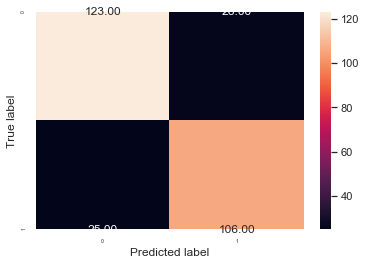

In [822]:
gboost_clf.fit(train_x, train_y )
pred_y_gb = gboost_clf.predict( test_x )
draw_cm( test_y, pred_y_gb ) 

1) True Positive(TP): 123 Good Credit(0) was predicted as positive.
    
2) False Positive(FP): 26 Good Credit(0) which was positive, but predicted as negative.
    
3) False Negative(FN): 25 Bad Credit(1) which was Negative but predicted as positive.
    
4) True Negative(TN): 106 Bad Credit(1) was predicted as the Negative


In [823]:
pred_glb = gboost_clf.predict(train_x)

### 5.5.1) Classification report

##### 5.5.1.1) Testing report

In [824]:
print( metrics.classification_report( test_y, pred_y_gb ) ) 

              precision    recall  f1-score   support

           0       0.83      0.83      0.83       149
           1       0.80      0.81      0.81       131

    accuracy                           0.82       280
   macro avg       0.82      0.82      0.82       280
weighted avg       0.82      0.82      0.82       280



##### 5.5.1.2) Training report 

In [825]:
print( metrics.classification_report( train_y, pred_glb ) ) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       551
           1       1.00      1.00      1.00       569

    accuracy                           1.00      1120
   macro avg       1.00      1.00      1.00      1120
weighted avg       1.00      1.00      1.00      1120



## 5.5.2) Finding Important features

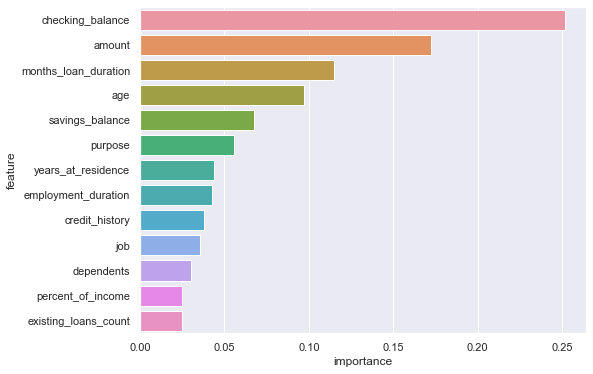

In [826]:
# Create a dataframe to store the featues and their corresponding importances
feature_rank = pd.DataFrame( {'feature': X.columns, 'importance': gboost_clf.feature_importances_ } )
## Sorting the features based on their importances with most important feature at top.
feature_rank = feature_rank.sort_values('importance', ascending = False)
plt.figure(figsize=(8, 6))
# plot the values
sns.barplot( y = 'feature', x = 'importance', data = feature_rank );

# 6) Result

The Machine learning algorithms that were used to build the models were:
    
1) Logistic Regression

2) Random Forest Classifier

3) Gradient Boosting

4) K-Nearest Neighbors (KNN)


The best-fit model among the ones created based on performance metrics was “Gradient Boosting”


Data-Set        Accuracy         Precision       f1-Score           Recall
    
    0         82       83          83      83
    1                  80          81      81
    

The top 5 features for Random Forest and Gradient Boosting are 

Checking_Balance, Amount, Age, Months_loan_duration, and Saving_balance.

he importance score is normalized and shows the relative importance of features.



## Conclusion 

According to me the best algorithm for this dataset is the Gradient Boosting machine learning algorithm.

Gradient Boosting has consistently demonstrated to be one of the most impressive algorithms to developed the predictive model. 

The one main reason the Gradient boosting algorithm is very good because it can easily overfit on a training data set. 

Different hyperparameters can be used to counter the overfitting. The Calculated Accuracy for this data set is 82% which

is better than Random Forest with 80%, KNN with 74%, and Logistic Regression with 74%.

